In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df1=pd.read_csv("/content/drive/MyDrive/Unemployment in India.csv")
df2=pd.read_csv("/content/drive/MyDrive/Unemployment_Rate_upto_11_2020.csv")

In [ ]:
df1.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
df2.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [ ]:
df1.shape

(754, 7)

In [ ]:
df2.shape

(267, 9)

In [ ]:
df1.isnull().sum()

,0
Region,14
Date,14
Frequency,14
Estimated Unemployment Rate (%),14
Estimated Employed,14
Estimated Labour Participation Rate (%),14
Area,14


In [ ]:
df1 = df1.dropna()

In [ ]:
df1.isnull().sum()

,0
Region,0
Date,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Area,0


In [ ]:
df2.isnull().sum()

,0
Region,0
Date,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Region.1,0
longitude,0
latitude,0


In [ ]:
df2=df2.dropna()


In [ ]:
# Standardize column names for both datasets
df1.columns = df1.columns.str.strip()
df2.columns = df2.columns.str.strip()

# Remove the duplicate 'Region' column in df2
df2 = df2.drop(columns=['Region.1'])

# Merge the datasets if needed
# Assuming we want to concatenate the datasets
df = pd.concat([df1, df2], ignore_index=True)


In [ ]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,longitude,latitude
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural,NaN,NaN
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural,NaN,NaN
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural,NaN,NaN
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural,NaN,NaN
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural,NaN,NaN


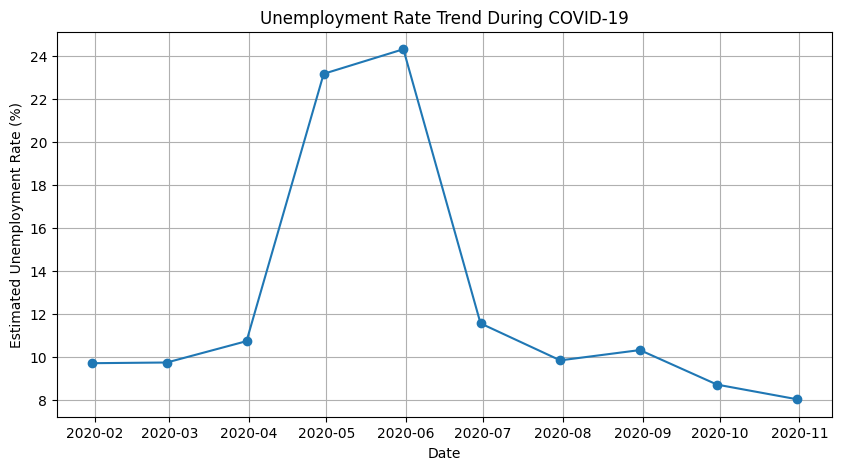

In [ ]:
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Filter data for the COVID-19 period (e.g., starting from January 2020)
covid_period = df[df['Date'] >= '2020-01-01']

# Group by Date and calculate the mean unemployment rate
unemployment_trend = covid_period.groupby('Date')['Estimated Unemployment Rate (%)'].mean()

# Plot the unemployment trend during COVID-19
plt.figure(figsize=(10, 5))
plt.plot(unemployment_trend.index, unemployment_trend.values, marker='o')
plt.title('Unemployment Rate Trend During COVID-19')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.grid(True)
plt.show()


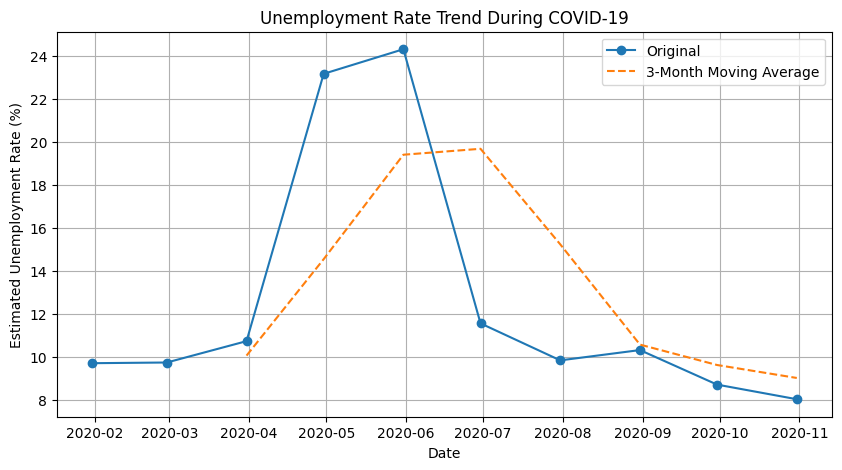

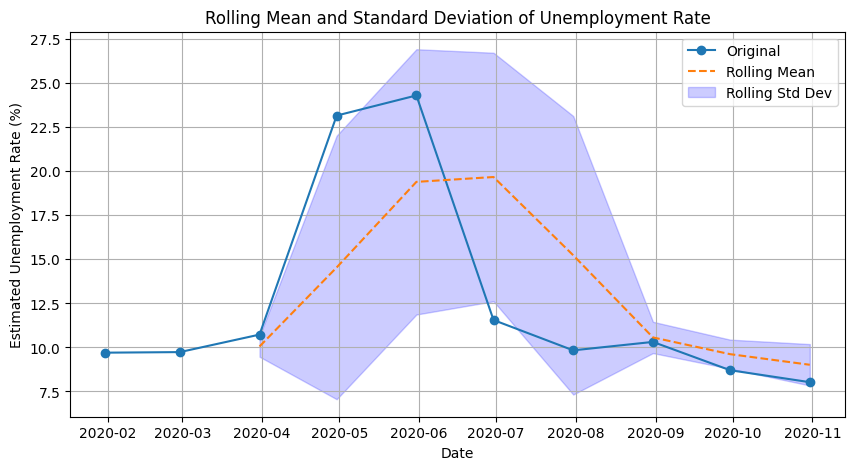

In [ ]:
#time series to analyse seasonal trends
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the 3-month moving average to smooth the data
unemployment_trend_ma = unemployment_trend.rolling(window=3).mean()

# Plot the original data and the moving average
plt.figure(figsize=(10, 5))
plt.plot(unemployment_trend.index, unemployment_trend.values, label='Original', marker='o')
plt.plot(unemployment_trend_ma.index, unemployment_trend_ma.values, label='3-Month Moving Average', linestyle='--')
plt.title('Unemployment Rate Trend During COVID-19')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

# Calculate the rolling mean and standard deviation
rolling_mean = unemployment_trend.rolling(window=3).mean()
rolling_std = unemployment_trend.rolling(window=3).std()

# Plot the rolling statistics
plt.figure(figsize=(10, 5))
plt.plot(unemployment_trend.index, unemployment_trend.values, label='Original', marker='o')
plt.plot(rolling_mean.index, rolling_mean.values, label='Rolling Mean', linestyle='--')
plt.fill_between(rolling_std.index, rolling_mean - rolling_std, rolling_mean + rolling_std, color='b', alpha=0.2, label='Rolling Std Dev')
plt.title('Rolling Mean and Standard Deviation of Unemployment Rate')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


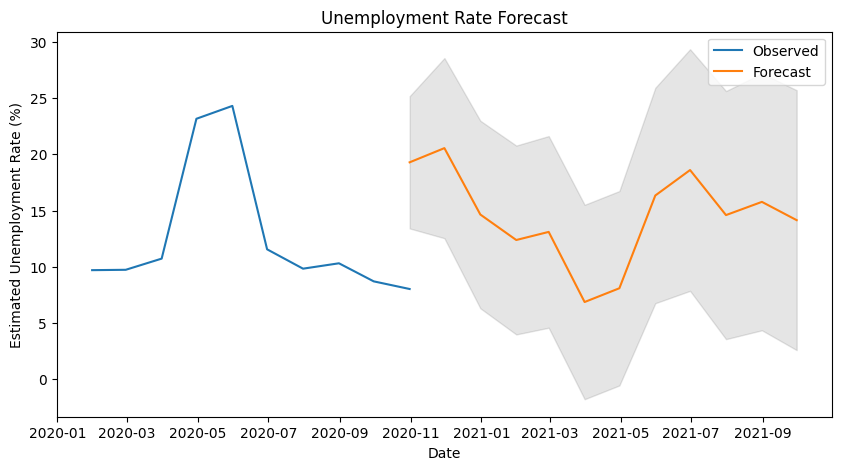

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assuming `unemployment_trend` has been previously defined
# If not, make sure to define `unemployment_trend` as shown in the previous steps

# Fit the ARIMA model
model = ARIMA(unemployment_trend, order=(5, 1, 0))
model_fit = model.fit()

# Forecast the future values
forecast = model_fit.get_forecast(steps=12)
forecast_index = pd.date_range(start=unemployment_trend.index[-1], periods=12, freq='M')
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(10, 5))
plt.plot(unemployment_trend.index, unemployment_trend.values, label='Observed')
plt.plot(forecast_index, forecast_values, label='Forecast')
plt.fill_between(forecast_index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='k', alpha=0.1)
plt.title('Unemployment Rate Forecast')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.legend()
plt.show()
